Dataset Link: https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir | findstr -i housing.csv

22-09-2019  01:36         1,423,529 housing.csv


In [3]:
housing = pd.read_csv("housing.csv")
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20640 instances and total bed rooms has 20433 non null values, which means, 207 values are missing

In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


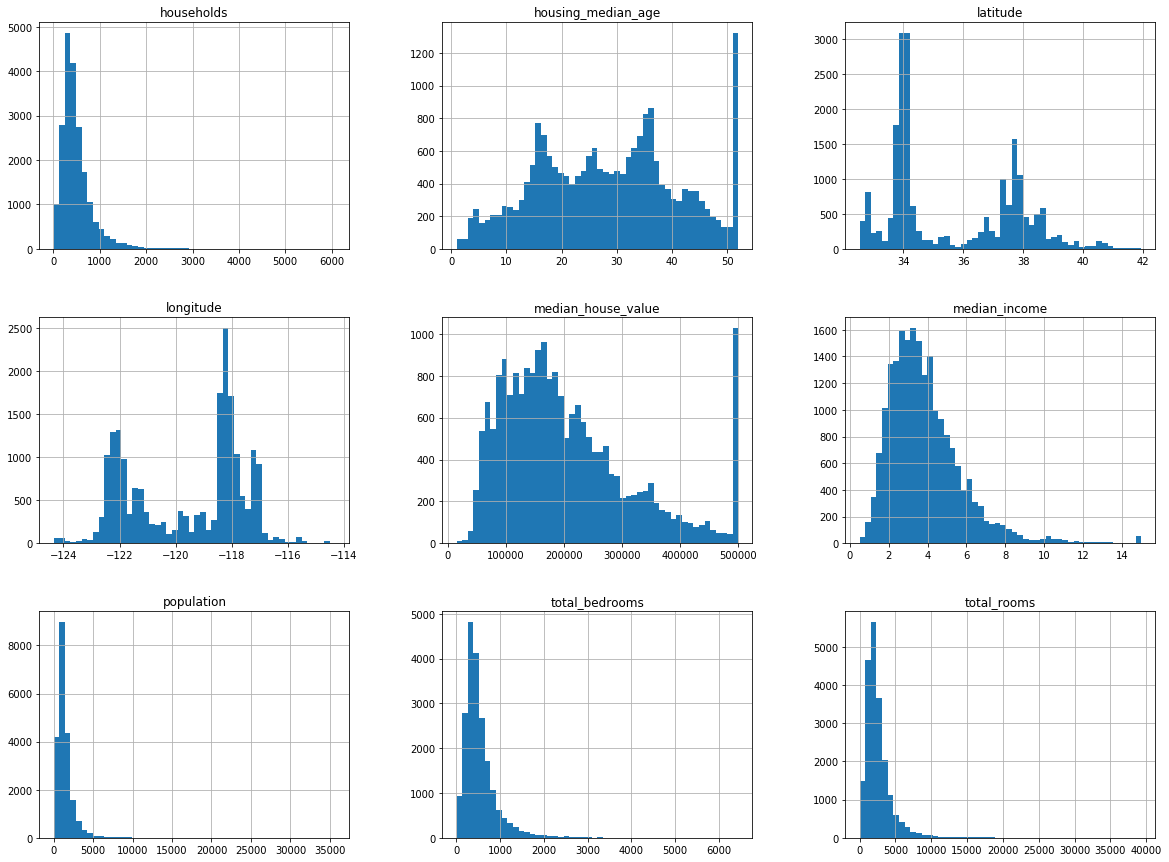

In [4]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

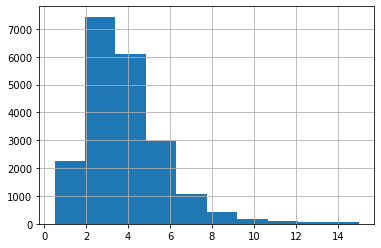

In [5]:
#median income looks like imp feature to consider for pricing house value
housing['median_income'].hist()

floor()function is the greatest integer less than n.

ceil() function is the smallest integer greater than n.

In [6]:
# divide the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income']/1.5)

#putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other = 5.0, inplace=True)

In [16]:
housing['income_cat'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64

In [25]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [7]:
#Startified Sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,  test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [8]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [9]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [11]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

**As seen above the proportions are maintained in the test set using stratified sampling**

**[Why Startified] :**  because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class

In [12]:
# experimenting: with random sampling now

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 29)

In [13]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

comparing_props = pd.DataFrame({
    "Overall_Props": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()

comparing_props["random %error"] = 100 * comparing_props["Random"] / comparing_props["Overall_Props"] - 100
comparing_props["strafied %error"] = 100 * comparing_props["Stratified"] / comparing_props["Overall_Props"] - 100
comparing_props

,Overall_Props,Random,Stratified,random %error,strafied %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [14]:
for items in (strat_test_set, strat_train_set):
    items.drop("income_cat", axis = 1, inplace = True)

In [15]:
housing = strat_train_set.copy()

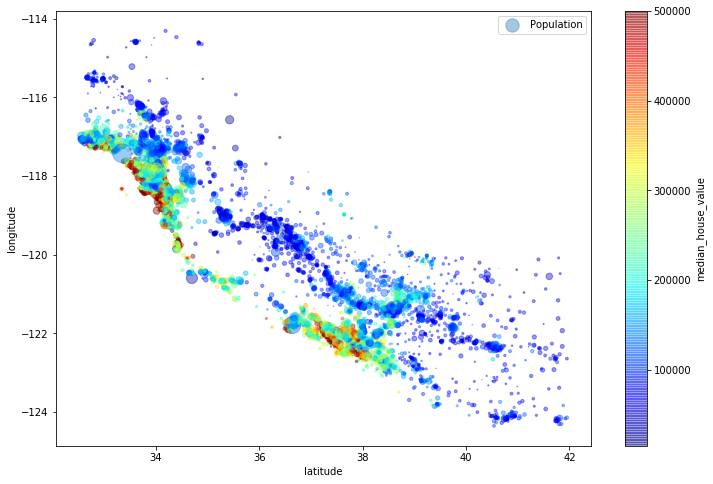

In [16]:
housing.plot(kind = "scatter", x = "latitude", y = "longitude" , alpha = 0.4,
             s = housing['population']/100, label = 'Population', figsize = (12,8),
             c = "median_house_value", cmap = plt.get_cmap("jet"), sharex = False)
plt.legend()

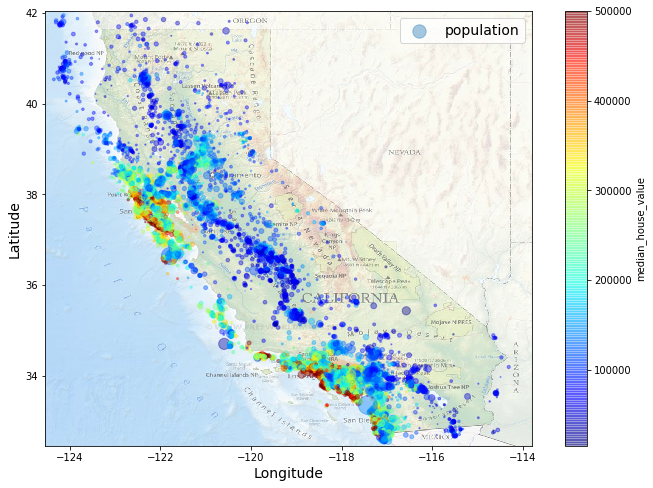

In [17]:
import matplotlib.image as mpimg

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("california.png", 0)

plt.imshow(california_img, extent = [-124.55, -113.8, 32.45, 42.05], alpha = 0.5, cmap = plt.get_cmap("jet"))
plt.xlabel("Longitude", fontsize = 14)
plt.ylabel("Latitude", fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

## Looking for correlations
(Pearsons Distance Correlation equation)

In [18]:
#Pandas has corr method to calculation correlations
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.691071
total_rooms           0.127306
housing_median_age    0.108483
households            0.060084
total_bedrooms        0.043921
population           -0.028341
longitude            -0.043780
latitude             -0.146422
Name: median_house_value, dtype: float64

its always between -1 (less correlated) and 1 (highly correlated)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4E865AD88>,
      dtype=object)

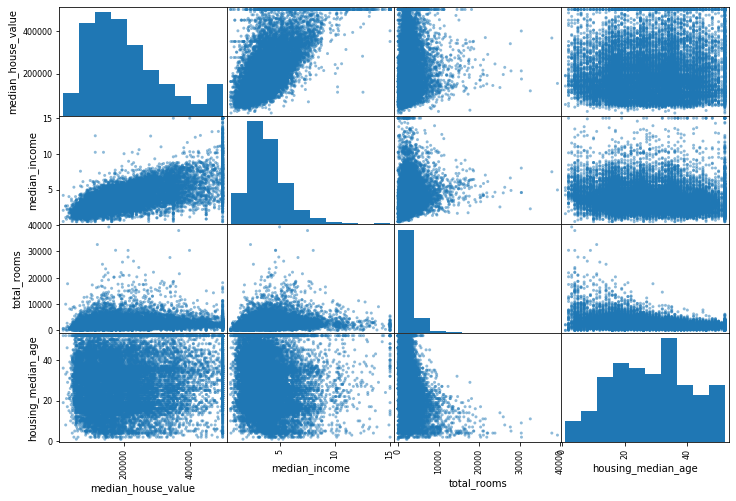

In [19]:
# other approach is to use the scatter plot in a A vs B fashion
#Problem with this is, for N features there will be N^2 plots

imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
from pandas.plotting import scatter_matrix
scatter_matrix(housing[imp_attributes], figsize = (12,8))

[0, 16, 0, 550000]

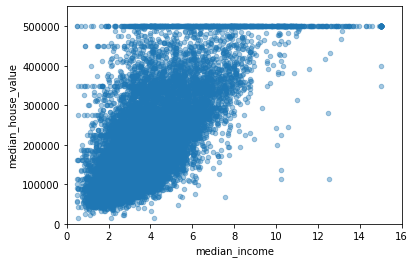

In [20]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.4)
plt.axis([0,16,0,550000])

## Feature Engineering

In [21]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [22]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691071
rooms_per_household         0.151804
total_rooms                 0.127306
housing_median_age          0.108483
households                  0.060084
total_bedrooms              0.043921
population_per_household   -0.021688
population                 -0.028341
longitude                  -0.043780
latitude                   -0.146422
bedrooms_per_room          -0.253572
Name: median_house_value, dtype: float64

**[observation]:** The new bedrooms_per_room is highly correlated but in a reciprocative way to the `median_house_value`, So the houses with lesser bedroom/room ratio will tend to be more expensive.

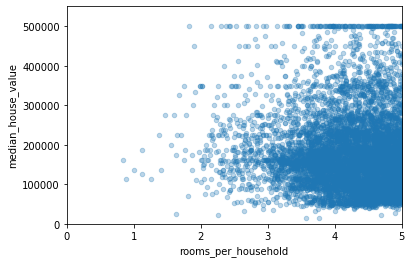

In [23]:
housing.plot(kind = "scatter", x = "rooms_per_household", y = "median_house_value", alpha = 0.3)
plt.axis([0, 5, 0, 550000])
plt.show()

In [44]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000
mean,-119.574691,35.642798,28.655220,2622.124879,535.192672,1418.447372,496.865492,3.870355,206418.759872,0.212973,3.103875,5.434516
std,2.005064,2.142773,12.535491,2171.310387,421.124910,1137.484934,382.194550,1.903633,115088.961605,0.058323,11.603193,2.520743
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.692308,0.846154
25%,-121.800000,33.930000,18.000000,1446.000000,295.000000,785.000000,279.000000,2.559725,119175.000000,0.175448,2.433980,4.443478
50%,-118.500000,34.260000,29.000000,2123.000000,433.000000,1159.000000,407.000000,3.532750,179650.000000,0.202964,2.817596,5.230221
75%,-118.010000,37.720000,37.000000,3121.250000,641.000000,1715.000000,599.000000,4.739375,264700.000000,0.239351,3.273248,6.056361
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1243.333333,141.909091


## Preparing the data for ML logs

In [24]:
housing_labels = housing_labels = strat_train_set["median_house_value"].copy()
housing = strat_train_set.drop("median_house_value",axis = 1)

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 7771 to 20194
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16349 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


## Data Cleansing

In [27]:
# when calculating imputing on your own
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()

median = housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(median, inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5654,-118.30,33.73,42.0,1731.0,433.0,866.0,403.0,2.7451,NEAR OCEAN
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,NEAR OCEAN
9814,-121.93,36.62,34.0,2351.0,433.0,1063.0,428.0,3.7250,NEAR OCEAN
14986,-117.03,32.73,34.0,2061.0,433.0,1169.0,400.0,3.5096,NEAR OCEAN
4767,-118.37,34.03,37.0,1236.0,433.0,966.0,292.0,3.0694,<1H OCEAN


In [28]:
# other approach using scikit-learn's impute class

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [29]:
housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
# imput basically computes across all the attributes, so if you want see across all the attributes, just call statistics_ method
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

In [32]:
housing.median().values

array([-118.5    ,   34.26   ,   29.     , 2123.     ,  433.     ,
       1159.     ,  407.     ,    3.53275])

## Using the imputer created above, transforming the training set by replacing the missing values by the learned medians

In [33]:
X = imputer.transform(housing_num)

In [34]:
hous_tr = pd.DataFrame(X, columns=housing_num.columns)

In [35]:
# Cross check for missing value
hous_tr[hous_tr.isnull().any(axis = 1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [36]:
hous_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.09,33.92,35.0,1994.0,419.0,1491.0,428.0,3.7383
1,-122.57,37.96,52.0,3458.0,468.0,1449.0,471.0,9.1834
2,-121.96,36.97,23.0,4324.0,1034.0,1844.0,875.0,3.0777
3,-118.28,34.02,52.0,281.0,103.0,470.0,96.0,1.9375
4,-116.50,33.81,26.0,5032.0,1229.0,3086.0,1183.0,2.5399


#### Handling categorical data

In [38]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

7771      <1H OCEAN
9352       NEAR BAY
18657    NEAR OCEAN
4873      <1H OCEAN
12350        INLAND
18621    NEAR OCEAN
15543     <1H OCEAN
14129    NEAR OCEAN
18136     <1H OCEAN
14418    NEAR OCEAN
Name: ocean_proximity, dtype: object

In [39]:
# using pandas own factorize() method to convert them into categorical features
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [40]:
housing_cat_encoded[:10]

array([0, 1, 2, 0, 3, 2, 0, 2, 0, 2], dtype=int64)

In [41]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [44]:
# using scikit-Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

C:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [43]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
# since OneHotEncoder returns Sparse matrix so need to change to dense array
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

### Custom Transformations

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix,bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self,X, y = None):
        return self # nothing to do here
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:,household_ix]
        populaton_per_household = X[:,population_ix] / X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, populaton_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household,populaton_per_household]
            

In [49]:
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room= False)
housing_extra_attribs = attr_addr.transform(housing.values)

In [50]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns = list(housing.columns)+["rooms_perhousehold", 
                                                                                             "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_perhousehold,population_per_household
0,-118.09,33.92,35,1994,419,1491,428,3.7383,<1H OCEAN,4.65888,3.48364
1,-122.57,37.96,52,3458,468,1449,471,9.1834,NEAR BAY,7.34183,3.07643
2,-121.96,36.97,23,4324,1034,1844,875,3.0777,NEAR OCEAN,4.94171,2.10743
3,-118.28,34.02,52,281,103,470,96,1.9375,<1H OCEAN,2.92708,4.89583
4,-116.5,33.81,26,5032,1229,3086,1183,2.5399,INLAND,4.25359,2.60862


## Setting up Pipeline for all the preprocessings

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("attributes",CombinedAttributesAdder()),
    ("std_scalar", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.74049299, -0.80402818,  0.50616062, ..., -0.30771122,
         0.03273077, -0.05512278],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.75666902,
        -0.0023651 , -1.17763788],
       [-1.18967887,  0.61940394, -0.45115041, ..., -0.19550447,
        -0.08587951,  0.38012387],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ..., -0.06328319,
        -0.06658929, -0.48812906],
       [-0.09741107,  0.51673015,  1.22414389, ..., -0.43053438,
         0.07888273,  0.19240118],
       [ 0.17690276, -0.64535051, -1.00958184, ..., -0.32344572,
        -0.05235215,  0.40450624]])

In [71]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X[self.attribute_names].values

In [72]:
# complete pipeline
 
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]


num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("Selector", DataFrameSelector(cat_attribs)),
    ("Cat_Encoder", OneHotEncoder(sparse = False))
])

In [73]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [74]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.74049299, -0.80402818,  0.50616062, ...,  0.        ,
         0.        ,  0.        ],
       [-1.49391785,  1.081436  ,  1.86235125, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18967887,  0.61940394, -0.45115041, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18967887,  0.79208259,  0.58593654, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09741107,  0.51673015,  1.22414389, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.17690276, -0.64535051, -1.00958184, ...,  0.        ,
         0.        ,  1.        ]])

# Selecting and Training the Model

In [75]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# trying the full pipeline on few training instances

data = housing.iloc[:5]
labels = housing_labels.iloc[:5]
data_prepared = full_pipeline.transform(data)

In [77]:
print("Prediction: ", lin_reg.predict(data_prepared))
print("Actual: ", list(labels))

Prediction:  [209526.30110297 455497.76141409 252936.22210586 173615.33127943
 114294.56522481]
Actual:  [166200.0, 500001.0, 263800.0, 38800.0, 94800.0]


In [79]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67949.91466225038

In [80]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_mse

0.0

### Cross Validation:

In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv = 10, scoring = "neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print("Scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [70767.97240331 68172.91707714 67471.81585394 72031.77212313
 69619.33170796 69231.28255776 69354.79080023 69660.33782533
 67234.30095293 70052.60306579]
mean:  69359.71243675085
std deviation:  1388.0743308596357


In [85]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv = 10, scoring = "neg_mean_squared_error")
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [67641.22210761 69245.155892   65690.83401976 67581.651926
 66586.04760743 66937.30771561 67397.33645629 69807.64170261
 66660.63451034 74883.89423608]
mean:  68243.17261737354
std deviation:  2500.726216291982


In [89]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=29, verbose=0,
                      warm_start=False)

In [90]:
housing_predictions = forest_reg.predict(housing_prepared)
random_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv = 10, scoring = "neg_mean_squared_error")
random_mse = mean_squared_error(housing_labels,housing_predictions)
random_rmse = np.sqrt(-random_scores)
display_scores(random_rmse)

Scores:  [50727.85369442 53777.59672741 50196.9006331  52163.3145675
 51773.76520866 52548.65794101 51587.29054027 51131.27756361
 51084.53618231 55110.13075575]
mean:  52010.13238140342
std deviation:  1408.6596990564344


## Fine Tuning Model:

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [92]:
# to get best combination of hyper parameters 
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [93]:
# to get best estimators direclty
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

62037.87755982073 {'max_features': 2, 'n_estimators': 3}
54332.48883878555 {'max_features': 2, 'n_estimators': 10}
51830.3193998388 {'max_features': 2, 'n_estimators': 30}
59756.28289380844 {'max_features': 4, 'n_estimators': 3}
51458.52505099452 {'max_features': 4, 'n_estimators': 10}
49933.026577999226 {'max_features': 4, 'n_estimators': 30}
58648.73313344325 {'max_features': 6, 'n_estimators': 3}
51700.17978991313 {'max_features': 6, 'n_estimators': 10}
49575.47094935204 {'max_features': 6, 'n_estimators': 30}
57991.88797648283 {'max_features': 8, 'n_estimators': 3}
51444.20268473327 {'max_features': 8, 'n_estimators': 10}
49503.23272404524 {'max_features': 8, 'n_estimators': 30}
61912.9014729328 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53822.456287752146 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58956.10106221559 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52070.2585683048 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [96]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066677,0.001521,0.003316,0.000396,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.004379e+09,-3.444368e+09,-4.035333e+09,-3.902419e+09,-3.857068e+09,-3.848698e+09,2.123852e+08,18
1,0.187186,0.000976,0.008333,0.000496,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.957566e+09,-2.906001e+09,-2.901464e+09,-2.981479e+09,-3.013599e+09,-2.952019e+09,4.327525e+07,11
2,0.565157,0.020614,0.022953,0.000365,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.695792e+09,-2.541475e+09,-2.707609e+09,-2.675094e+09,-2.811982e+09,-2.686382e+09,8.653546e+07,8
3,0.087442,0.002100,0.003101,0.000204,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.643456e+09,-3.558286e+09,-3.558577e+09,-3.465895e+09,-3.627834e+09,-3.570813e+09,6.299533e+07,16
4,0.290275,0.004168,0.008425,0.000489,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.661011e+09,-2.533465e+09,-2.697520e+09,-2.678534e+09,-2.669401e+09,-2.647980e+09,5.853556e+07,6
5,0.881384,0.013363,0.023159,0.000200,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.506681e+09,-2.355721e+09,-2.494249e+09,-2.500230e+09,-2.609692e+09,-2.493307e+09,8.087607e+07,3
6,0.121755,0.002544,0.003002,0.000012,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.384526e+09,-3.492346e+09,-3.437350e+09,-3.566695e+09,-3.317453e+09,-3.439674e+09,8.589610e+07,14
7,0.407166,0.006002,0.008819,0.000406,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.613042e+09,-2.598180e+09,-2.705044e+09,-2.617184e+09,-2.831133e+09,-2.672909e+09,8.756638e+07,7
8,1.235981,0.021124,0.022967,0.000382,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.475249e+09,-2.386102e+09,-2.435086e+09,-2.454404e+09,-2.537812e+09,-2.457727e+09,4.974856e+07,2
9,0.155083,0.001649,0.003104,0.000488,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.335601e+09,-3.142871e+09,-3.440482e+09,-3.424182e+09,-3.472234e+09,-3.363059e+09,1.190737e+08,13


In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs = {
    'n_estimators': randint(low = 1, high = 200),
    'max_features': randint(low = 1, high = 8),
  
}
rf_reg = RandomForestRegressor(random_state=29)
rnd_search = RandomizedSearchCV(rf_reg, param_distributions = params_distibs, n_iter=10, 
                                cv = 5, scoring = "neg_mean_squared_error", random_state=29)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [108]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

62037.87755982073 {'max_features': 2, 'n_estimators': 3}
54332.48883878555 {'max_features': 2, 'n_estimators': 10}
51830.3193998388 {'max_features': 2, 'n_estimators': 30}
59756.28289380844 {'max_features': 4, 'n_estimators': 3}
51458.52505099452 {'max_features': 4, 'n_estimators': 10}
49933.026577999226 {'max_features': 4, 'n_estimators': 30}
58648.73313344325 {'max_features': 6, 'n_estimators': 3}
51700.17978991313 {'max_features': 6, 'n_estimators': 10}
49575.47094935204 {'max_features': 6, 'n_estimators': 30}
57991.88797648283 {'max_features': 8, 'n_estimators': 3}
51444.20268473327 {'max_features': 8, 'n_estimators': 10}
49503.23272404524 {'max_features': 8, 'n_estimators': 30}
61912.9014729328 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53822.456287752146 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58956.10106221559 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52070.2585683048 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [110]:
pd.DataFrame(rnd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.487183,0.130889,0.084020,0.001726,6,116,"{'max_features': 6, 'n_estimators': 116}",-2.345560e+09,-2.241925e+09,-2.357194e+09,-2.329061e+09,-2.514156e+09,-2.357571e+09,8.814695e+07,2
1,1.149525,0.008584,0.026476,0.001026,5,35,"{'max_features': 5, 'n_estimators': 35}",-2.500420e+09,-2.334777e+09,-2.429211e+09,-2.390803e+09,-2.568044e+09,-2.444648e+09,8.191088e+07,5
2,1.291567,0.031427,0.070990,0.002407,1,97,"{'max_features': 1, 'n_estimators': 97}",-2.864489e+09,-2.818804e+09,-2.825577e+09,-2.832746e+09,-3.007254e+09,-2.869770e+09,7.049668e+07,9
3,1.993222,0.031230,0.081817,0.002064,2,114,"{'max_features': 2, 'n_estimators': 114}",-2.602517e+09,-2.518801e+09,-2.551076e+09,-2.594978e+09,-2.687721e+09,-2.591015e+09,5.711330e+07,6
4,1.279570,0.008109,0.069978,0.000747,1,98,"{'max_features': 1, 'n_estimators': 98}",-2.865412e+09,-2.819868e+09,-2.830297e+09,-2.833021e+09,-3.005589e+09,-2.870834e+09,6.907506e+07,10
5,4.153002,0.053618,0.069605,0.002885,7,95,"{'max_features': 7, 'n_estimators': 95}",-2.369444e+09,-2.265294e+09,-2.325914e+09,-2.388723e+09,-2.476401e+09,-2.365150e+09,6.994504e+07,4
6,2.083293,0.020073,0.112693,0.002343,1,156,"{'max_features': 1, 'n_estimators': 156}",-2.863177e+09,-2.799923e+09,-2.808834e+09,-2.821896e+09,-2.993315e+09,-2.857426e+09,7.131182e+07,8
7,5.795171,0.025130,0.111890,0.005579,6,149,"{'max_features': 6, 'n_estimators': 149}",-2.351352e+09,-2.245663e+09,-2.341533e+09,-2.326498e+09,-2.507883e+09,-2.354579e+09,8.524452e+07,1
8,6.736821,0.095131,0.112886,0.002584,7,152,"{'max_features': 7, 'n_estimators': 152}",-2.367270e+09,-2.249417e+09,-2.324388e+09,-2.367661e+09,-2.481794e+09,-2.358100e+09,7.539828e+07,3
9,2.227061,0.023800,0.119518,0.001933,1,165,"{'max_features': 1, 'n_estimators': 165}",-2.869698e+09,-2.796720e+09,-2.807505e+09,-2.817913e+09,-2.990859e+09,-2.856536e+09,7.167681e+07,7


In [111]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.80512295e-02, 6.40906761e-02, 4.27906116e-02, 1.49676397e-02,
       1.46455117e-02, 1.48349101e-02, 1.29800327e-02, 4.00849028e-01,
       4.43549331e-02, 1.09809542e-01, 5.85936643e-02, 9.73097787e-03,
       1.39100607e-01, 2.45824761e-04, 1.98159246e-03, 2.97321886e-03])

In [113]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["Cat_Encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.40084902768404884, 'median_income'),
 (0.13910060699676313, 'INLAND'),
 (0.10980954245612652, 'pop_per_hhold'),
 (0.06805122947888011, 'longitude'),
 (0.06409067609350276, 'latitude'),
 (0.05859366433977778, 'bedrooms_per_room'),
 (0.04435493313155879, 'rooms_per_hhold'),
 (0.042790611628964706, 'housing_median_age'),
 (0.014967639698009325, 'total_rooms'),
 (0.01483491011436287, 'population'),
 (0.014645511715412939, 'total_bedrooms'),
 (0.012980032714513664, 'households'),
 (0.009730977865375858, '<1H OCEAN'),
 (0.002973218863231233, 'NEAR OCEAN'),
 (0.001981592458799715, 'NEAR BAY'),
 (0.00024582476067184784, 'ISLAND')]

In [115]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

50499.750502866016